# モデルの学習

In [1]:
# import libraries

import numpy as np
import pandas as pd
import gc
import os
import json
from collections import Counter, defaultdict
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import plotly.express as px
import re
import datetime as dt
import japanize_matplotlib
import itertools
year_pattern = r'([1-2][0-9]{3})'

In [2]:
DATAPATH = "../../../data/"
START_YEAR = 2008
END_YEAR = 2020
YEAR_STD = END_YEAR - START_YEAR 

In [3]:
def get_metadata(filename):
    with open(DATAPATH + filename, encoding="utf-8", mode='r') as f:
        for line in f:
            yield line

In [4]:
with open(DATAPATH + "DBLP/keywords.txt") as f:
    keywords = list(map(lambda x: x.replace("\n", ""), f.readlines()))
key_sets = set(keywords)
N = len(keywords)

In [5]:
word_dict = {}
for num, kw in enumerate(keywords):
    word_dict[kw] = num

In [6]:
datas = np.load(DATAPATH + "DBLP/pathes.npy")
datas.shape

(7075, 7075, 13)

In [65]:
a = np.zeros([7075,7075])
for i in range(7075):
    for j in range(7075):
        b = sum(datas[i][j])
        a[i][j] = b
        if i > j and b > 0:
            print(i, j, b)
            break

In [66]:
c = np.zeros(7075)
for i in range(7075):
    c[i] = sum(a[i]) + sum(a[ :, i])

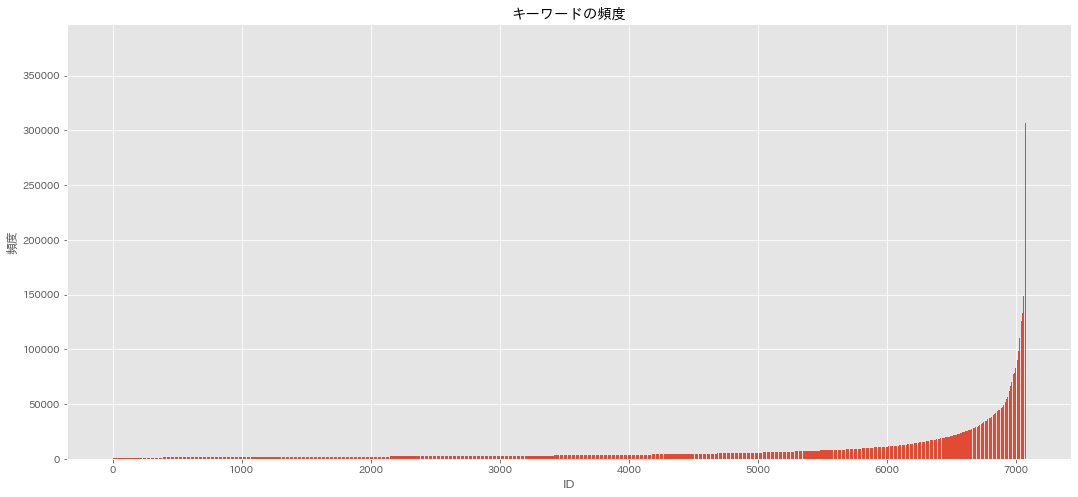

In [67]:
plt.style.use("ggplot")

# FigureとAxesを作成
fig, ax = plt.subplots(figsize=(18,8))

# タイトルと軸ラベルを設定
ax.set_title("キーワードの頻度")
ax.set_xlabel("ID")
ax.set_ylabel("頻度")

# Axesに棒グラフを追加
ax.bar(range(7075), sorted(c))

plt.show()